## Classification Project

The medical information of a patient is described as follows. Estimate the probibility of heart attack in this patient.

- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
 - Value 1: typical angina
 - Value 2: atypical angina
 - Value 3: non-anginal pain
 - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

## Logistic Regression Model
First, the logistic regression method is implemented to predict the probability of heart attack in a patient. 

In [188]:
#importing needed packages
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [189]:
my_data = pd.read_csv("heart.csv", delimiter=",")
my_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [190]:
#defining x and y for our dataset and splitting test and train
X = np.asarray(my_data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']])
y = np.asarray(my_data["output"].values)

X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [191]:
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for LR_solver in solver_list:
    LR = LogisticRegression(C=0.01, solver=LR_solver).fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    
    print("Results for "+LR_solver+" solver")
    print("Jaccard score :"+str(jaccard_score(y_test, yhat,pos_label=0)))
    print (classification_report(y_test, yhat))

Results for newton-cg solver
Jaccard score :0.7692307692307693
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.88      0.97      0.92        36

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61

Results for lbfgs solver
Jaccard score :0.7692307692307693
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.88      0.97      0.92        36

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61

Results for liblinear solver
Jaccard score :0.75
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accurac

It can be seen that except liblinear solver, all other solvers lead to a similar and acceptabel result.
In this case, lbfgs solver is selected.

### Plotting the confusion matrix

In [192]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[20  5]
 [ 1 35]]


Confusion matrix, without normalization
[[20  5]
 [ 1 35]]
Results for saga solver
Jaccard score :0.7692307692307693
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.88      0.97      0.92        36

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



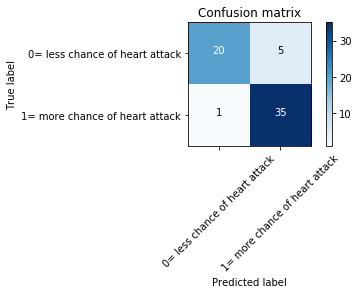

In [193]:
LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0= less chance of heart attack','1= more chance of heart attack'],normalize= False,  title='Confusion matrix')

#
print("Results for "+LR_solver+" solver")
print("Jaccard score :"+str(jaccard_score(y_test, yhat,pos_label=0)))
print (classification_report(y_test, yhat))

In [194]:
#reporting the logloss of the model
from sklearn.metrics import log_loss
print("Log loss: "+str(log_loss(y_test, yhat_prob)))

Log loss: 0.4307265509505645


## Support Vector machines
In this section, the SVM method is used to for modelling and prediction of the chance of heart attack. Then the results are compared to the proposed logistic regression model.

### Loading the data

In [195]:
X = np.asarray(my_data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']])
y = np.asarray(my_data["output"].values)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [196]:
from sklearn import svm

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
for svm_kernel in kernel_list:
    clf = svm.SVC(kernel=svm_kernel)
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
    np.set_printoptions(precision=2)
    print("Results for "+svm_kernel+" kernel")
    print("Jaccard score: "+ str(jaccard_score(y_test, yhat,pos_label=1)))
    print (classification_report(y_test, yhat,zero_division=0))


Results for linear kernel
Jaccard score: 0.8717948717948718
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

Results for poly kernel
Jaccard score: 0.6382978723404256
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        25
           1       0.73      0.83      0.78        36

    accuracy                           0.72        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.72      0.71        61

Results for rbf kernel
Jaccard score: 0.6078431372549019
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        25
           1       0.67      0.86      0.76        36

    acc

It can be seen that the has the best result, thus this setting is being used for evaluation of the chance of heat attack.

### plotting confusion matrix

In [197]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [198]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[22  3]
 [ 2 34]]
Results for sigmoid kernel
Jaccard score: 0.8717948717948718
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



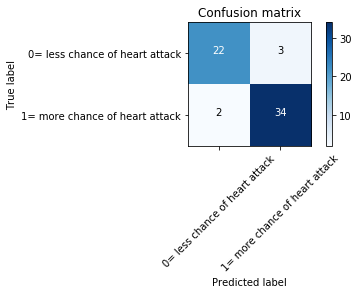

In [199]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0= less chance of heart attack','1= more chance of heart attack'],normalize= False,  title='Confusion matrix')
#
print("Results for "+svm_kernel+" kernel")
print("Jaccard score: "+ str(jaccard_score(y_test, yhat,pos_label=1)))
print (classification_report(y_test, yhat,zero_division=0))

## Conclusion
Although the linear SVM model has slightly higher score compared to the logistic regression method, the logistic regression is selected as the final model due to the lower false negative results.
